NAMA : MATIUS YUDIKA SITORUS<br>
NIM : 211351079<br>
KELAS : MALAM B

**Import Dataset**

In [124]:
import pandas as pd

In [125]:
path_dataset="/content/diabetes.csv"
# disini saya menggunakan copypath dalam google colab

In [126]:
df=pd.read_csv(path_dataset)

In [127]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Import Library yang digunakan**

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets, neighbors
from sklearn import metrics
import pickle
sns.set()
import warnings; warnings.filterwarnings('ignore')

**Data Discovery**

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [162]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((514, 8), (254, 8), (514,), (254,))

In [132]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

## menunjukkan hitungan Null
print(df_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [168]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [177]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [170]:
X = df.drop("BMI",axis = 1)
y = df.BMI

**EDA (minimal 5)**

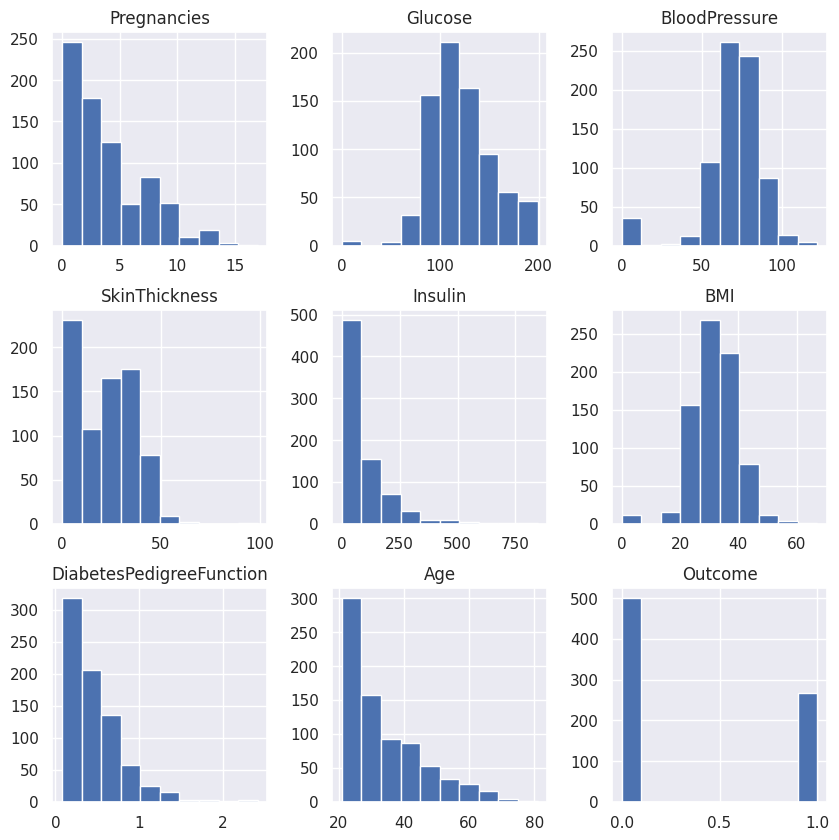

In [171]:
p = df.hist(figsize = (10,10))

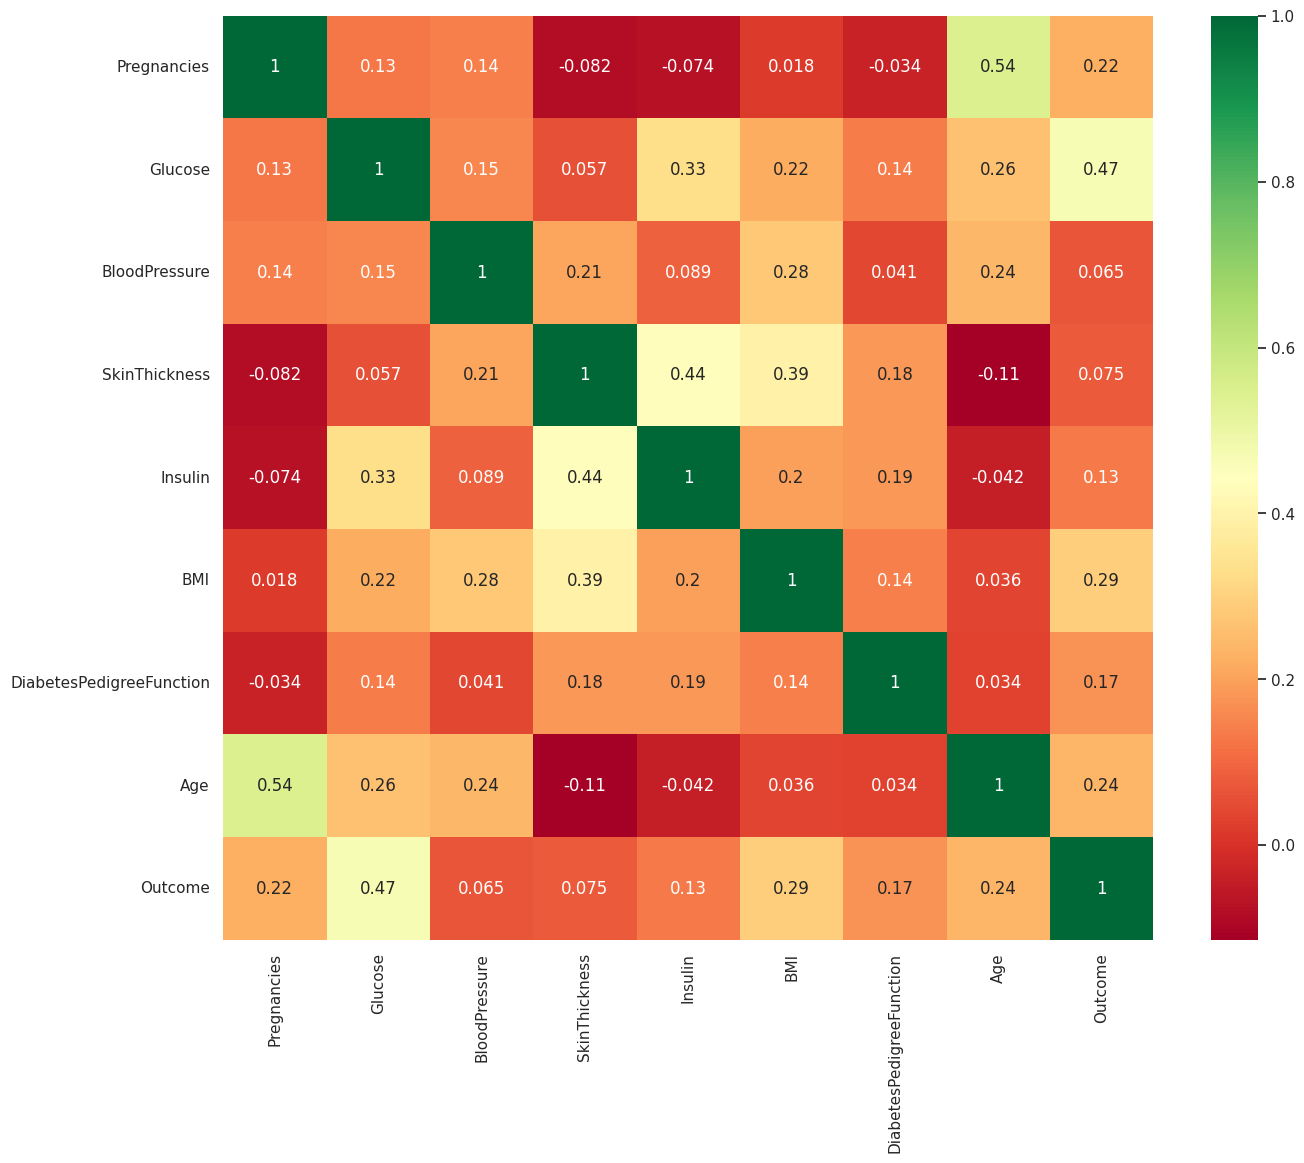

In [136]:
plt.figure(figsize=(15,12))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

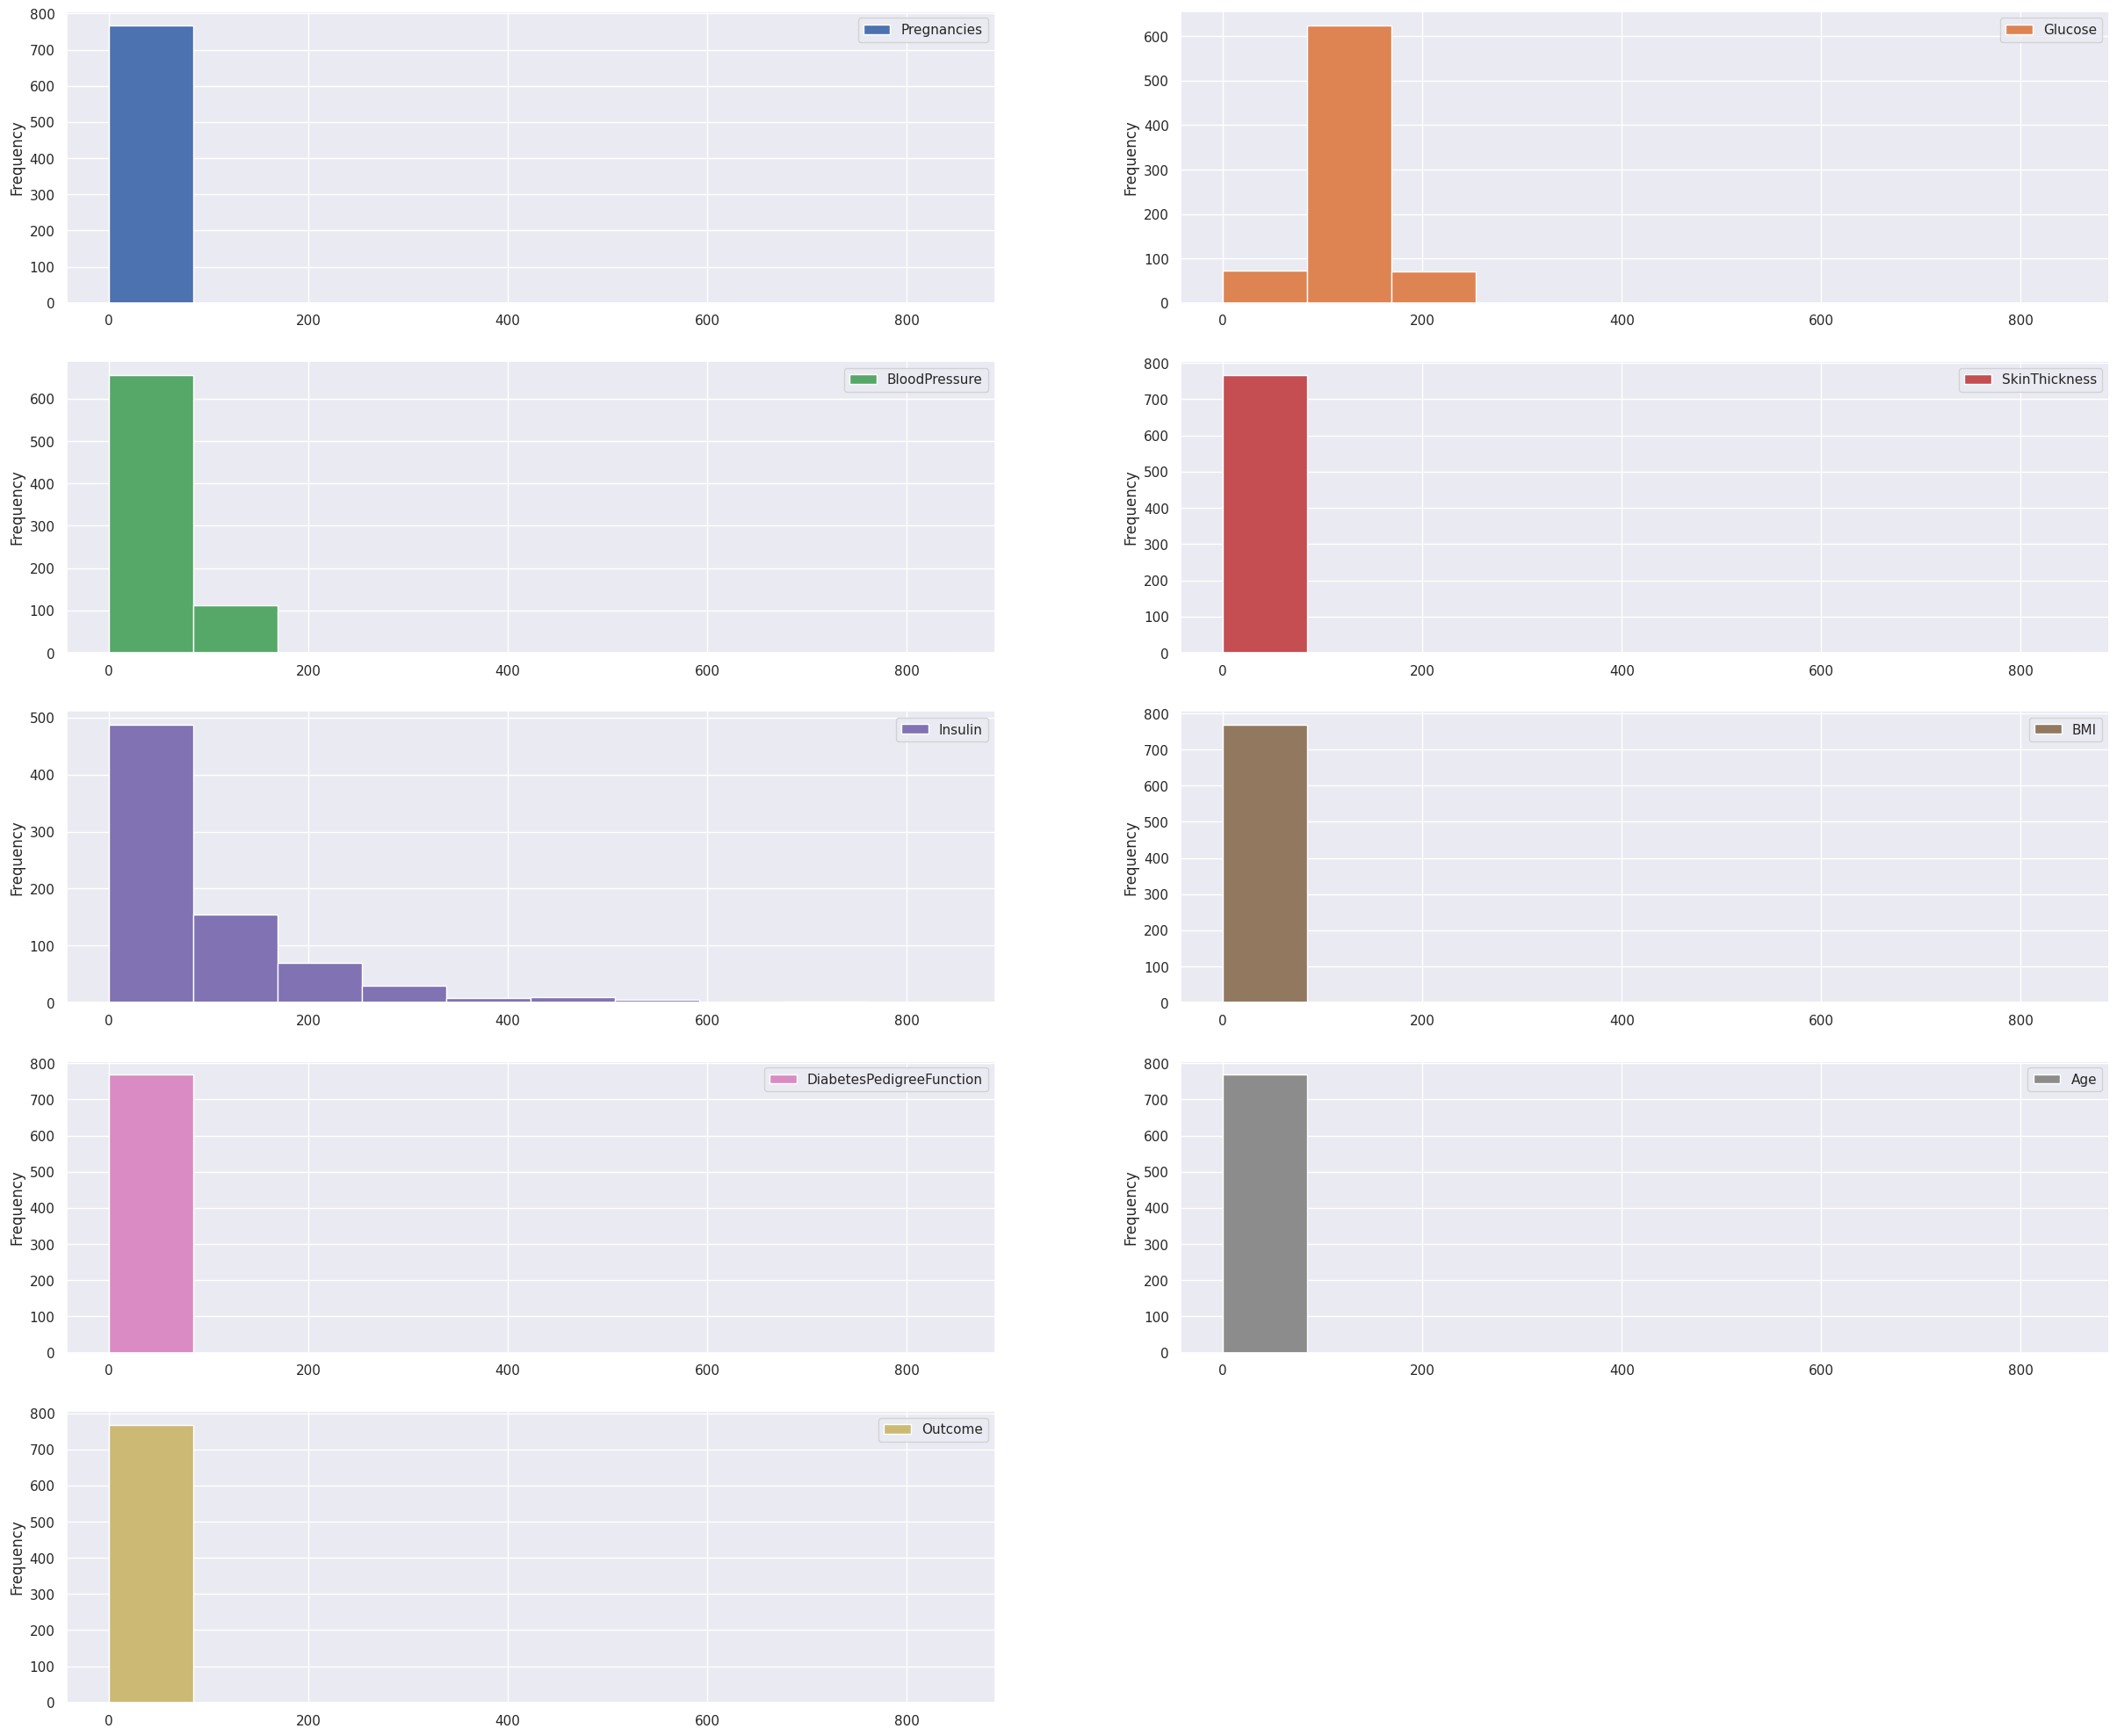

In [212]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

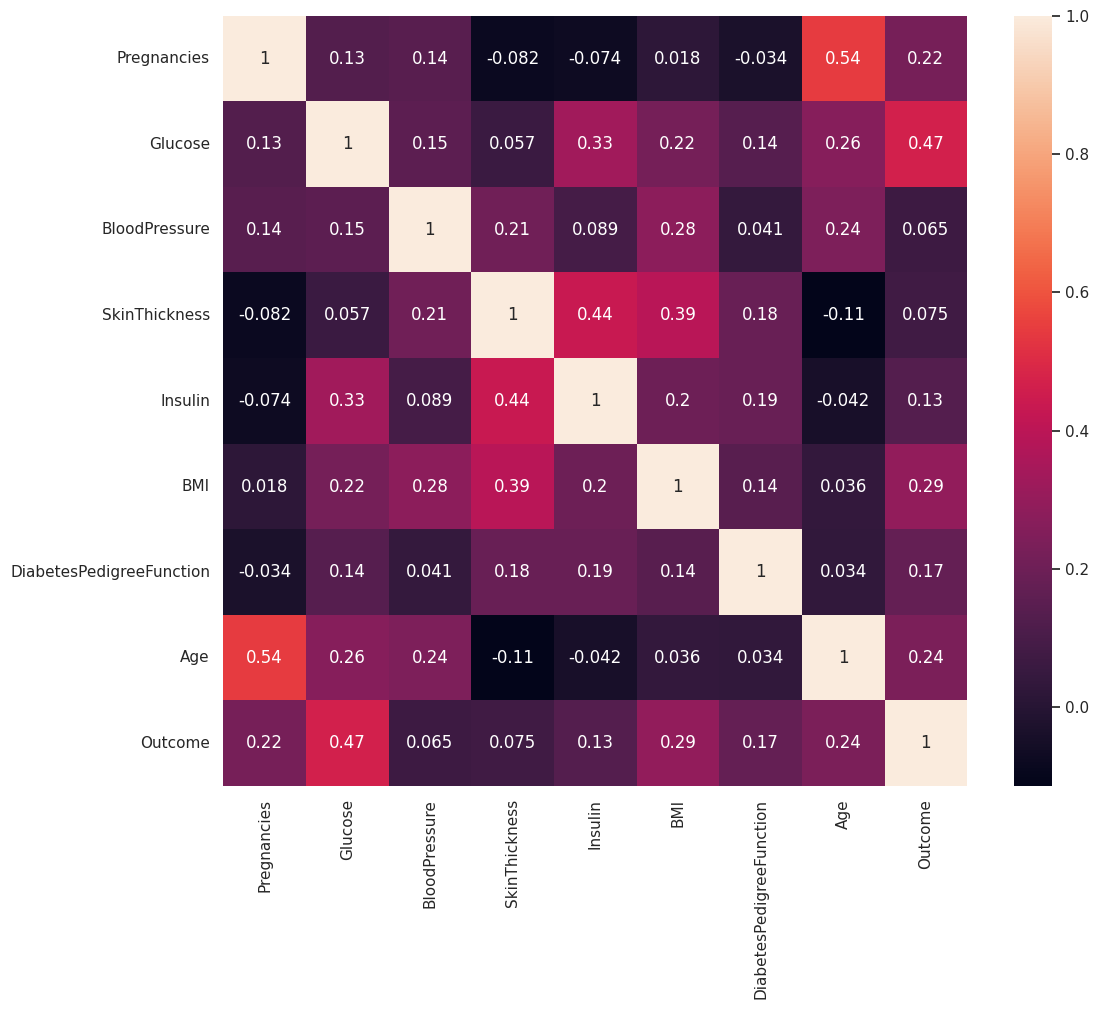

In [138]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True)

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


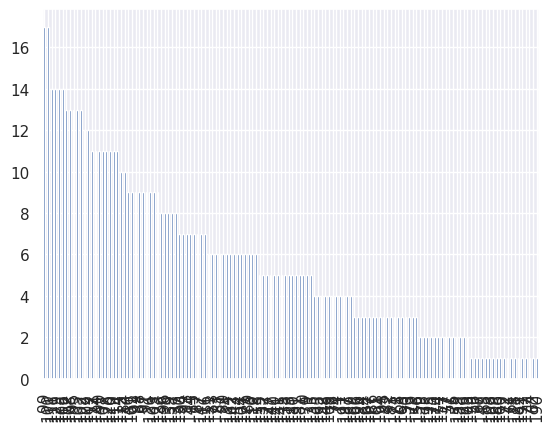

In [139]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf",
               2: "#7bc043"}
colors = df["Glucose"].map(lambda x: color_wheel.get(x + 1))
print(df.Glucose.value_counts())
p=df.Glucose.value_counts().plot(kind="bar")

**Preprocessing**

In [165]:
df.dropna(inplace=True)

In [143]:
df.drop_duplicates(inplace=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [144]:
# X = df.drop("Outcome", axis = 1)
y = df.Outcome
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Modeling**

In [198]:
X = df.drop('Outcome',axis=1).values
Y = df[["Outcome"]]

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=20)

In [193]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [216]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

print("Akurasi model KNN =", knn_model.score(X_train,y_train))

Akurasi model KNN = 0.8584729981378026


In [218]:
prediction = knn_model.predict(X_test)

input_data = np.array([[6,148,72,35,0,33.6,0.627,50]]) # 1

prediction = knn_model.predict(input_data)
if(prediction[0] == 1) :
  print("Diabetes")
else:
  print("Tidak diabetes")

Diabetes


# **Visualisasi hasil algoritma**

In [233]:
def knn_comparison(data, k, ax):
    x = data[['Glucose','Pregnancies']].values
    y = data['Outcome'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)

    plot_decision_regions(x, y, clf=clf, legend=2, ax=ax)
    ax.set_xlabel('Glucose')
    ax.set_ylabel('Pregnancies')
    ax.set_title('Knn with K=' + str(k))

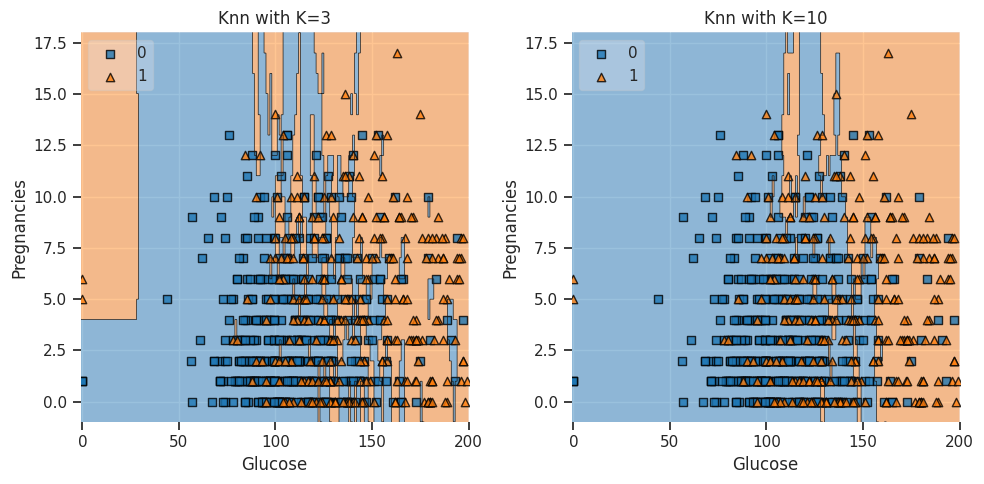

In [234]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ks = [3, 10]

for i, ax in enumerate(axs.flatten()):
    knn_comparison(df, ks[i], ax)

plt.tight_layout()
plt.show()

# save model (pickle)

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(knn_model, open(filename, 'wb'))